<a href="https://colab.research.google.com/github/inaafina/ArrhythmiaAI/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project - Team AI Lop IF**

**Model selection: Decision Tree, kNN, Naïve Bayes**



Dataset: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

---





# Import Library

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Loading Dataset

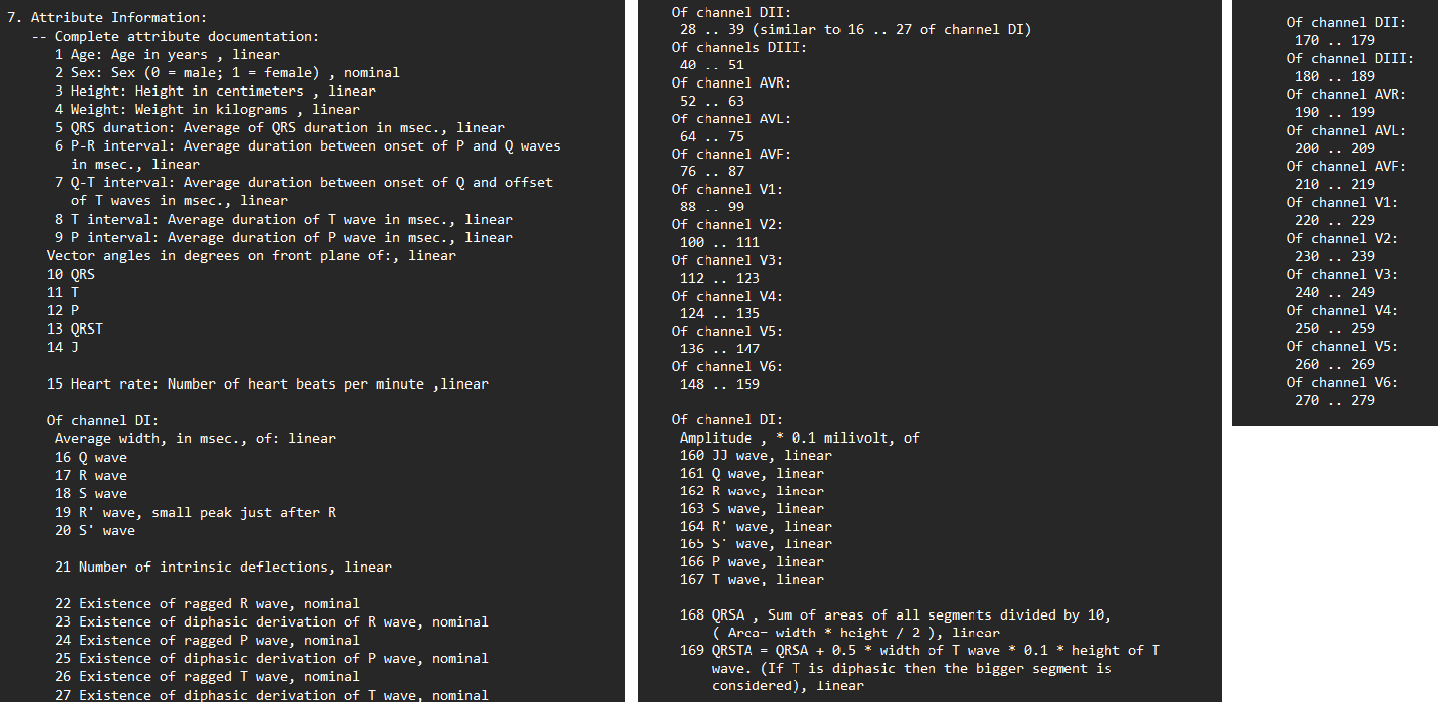

In [61]:
df = pd.read_csv('data_arrhythmia.csv')

In [62]:
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


# Data Pre-processing

## Checking the null value of each attributes 

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [64]:
df.replace(['?'], np.nan, inplace=True)

In [65]:
null_counts = df.isnull().sum()
print("Null value counts per column:")

for column, count in null_counts.items():
  print(f"{column}: {count}")

Null value counts per column:
age: 0
sex: 0
height: 0
weight: 0
qrs_duration: 0
p-r_interval: 0
q-t_interval: 0
t_interval: 0
p_interval: 0
qrs: 0
T: 8
P: 22
QRST: 1
J: 376
heart_rate: 1
q_wave: 0
r_wave: 0
s_wave: 0
R'_wave: 0
S'_wave: 0
AA: 0
AB: 0
AC: 0
AD: 0
AE: 0
AF: 0
AG: 0
AH: 0
AI: 0
AJ: 0
AK: 0
AL: 0
AM: 0
AN: 0
AO: 0
AP: 0
AR: 0
AS: 0
AT: 0
AU: 0
AV: 0
AY: 0
AZ: 0
AB': 0
BB: 0
BC: 0
BD: 0
BE: 0
BF: 0
BG: 0
BH: 0
BI: 0
BJ: 0
BK: 0
BL: 0
BM: 0
BN: 0
BO: 0
BP: 0
BR: 0
BS: 0
BT: 0
BU: 0
BV: 0
BY: 0
BZ: 0
CA: 0
CB: 0
CC: 0
CD: 0
CE: 0
Cf: 0
CG: 0
CH: 0
CI: 0
CJ: 0
CK: 0
CL: 0
CM: 0
CN: 0
CO: 0
CP: 0
CR: 0
CS: 0
CT: 0
CU: 0
CV: 0
CY: 0
CZ: 0
DA: 0
DB: 0
DC: 0
DD: 0
DE: 0
DF: 0
DG: 0
DH: 0
DI: 0
DJ: 0
DK: 0
DL: 0
DM: 0
DN: 0
DO: 0
DP: 0
DR: 0
DS: 0
DT: 0
DU: 0
DV: 0
DY: 0
DZ: 0
EA: 0
EB: 0
EC: 0
ED: 0
EF: 0
EG: 0
EH: 0
EI: 0
EJ: 0
EK: 0
EL: 0
EM: 0
EN: 0
EO: 0
EP: 0
ER: 0
ES: 0
ET: 0
EU: 0
EV: 0
EY: 0
EZ: 0
FA: 0
FB: 0
FC: 0
FD: 0
FE: 0
FF: 0
FG: 0
FH: 0
FI: 0
FJ: 0
FK: 0
FL: 0
FM: 

In [66]:
# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Verify the data type conversion
print(df.dtypes)


age               int64
sex               int64
height            int64
weight            int64
qrs_duration      int64
                 ...   
LD              float64
LE              float64
LF              float64
LG              float64
diagnosis         int64
Length: 280, dtype: object


## Mean Imputation

The attributes with Null Value found is this: 
* T: 8
* P: 22
* QRST: 1
* J: 376
* heart_rate: 1

Here we going to replace the Null value, using Mean Imputation



In [67]:
column_mean_11 = df['T'].mean()
column_mean_12 = df['P'].mean()
column_mean_13 = df['QRST'].mean()
column_mean_14 = df['J'].mean()
column_mean_15 = df['heart_rate'].mean()
print("Mean of the column T:", column_mean_11)
print("Mean of the column P:", column_mean_12)
print("Mean of the column QRST:", column_mean_13)
print("Mean of the column J:", column_mean_14)
print("Mean of the column heart_rate:", column_mean_15)

Mean of the column T: 36.1509009009009
Mean of the column P: 48.913953488372094
Mean of the column QRST: 36.71618625277162
Mean of the column J: -13.592105263157896
Mean of the column heart_rate: 74.46341463414635


In [68]:
# Replace NaN values with the mean
df['T'].fillna(column_mean_11, inplace=True)
df['P'].fillna(column_mean_12, inplace=True)
df['QRST'].fillna(column_mean_13, inplace=True)
df['J'].fillna(column_mean_14, inplace=True)
df['heart_rate'].fillna(column_mean_15, inplace=True)

In [69]:
if df.isnull().any().any():
    print("Null values found in the DataFrame")

## Checking and Dropping Outliers

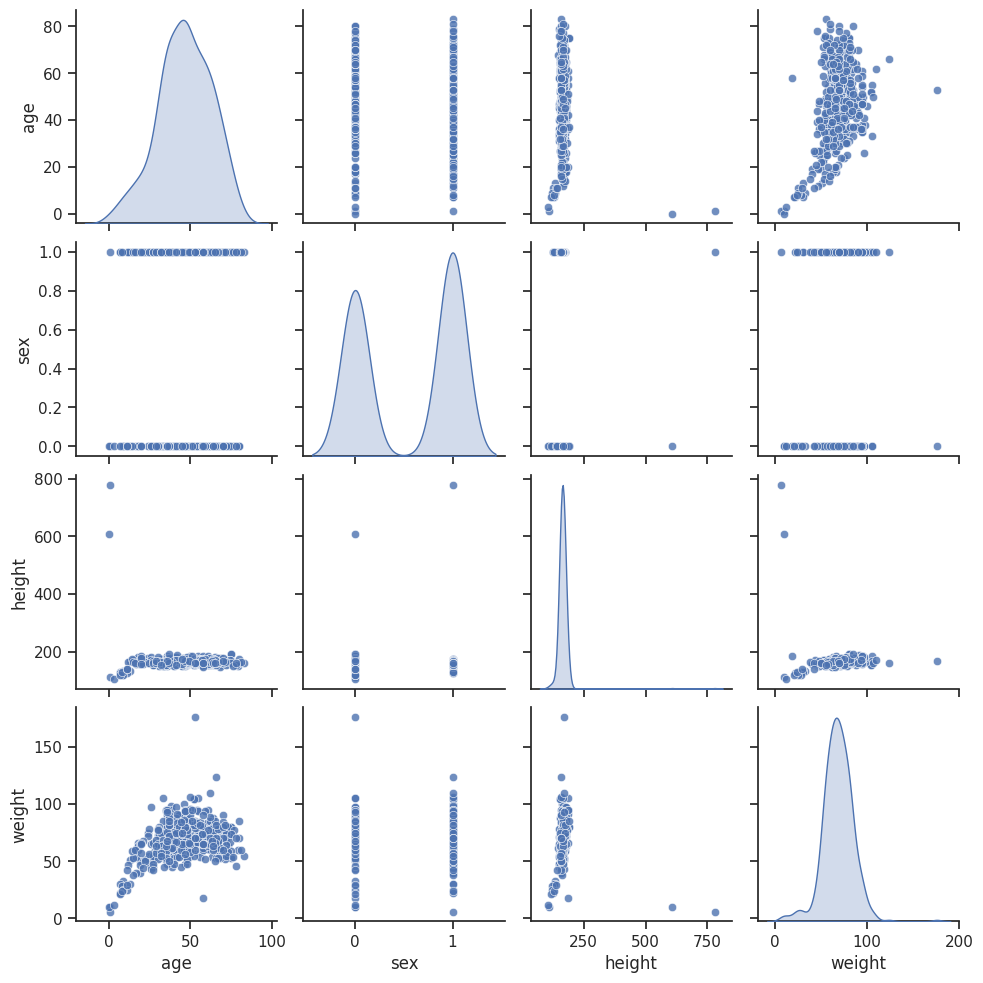

In [70]:
selected_columns = ['age', 'sex', 'height', 'weight'] 
subset_df = df[selected_columns]

sns.set(style='ticks')
sns.pairplot(subset_df, diag_kind='kde', plot_kws={'alpha': 0.8})

<Axes: xlabel='variable', ylabel='value'>

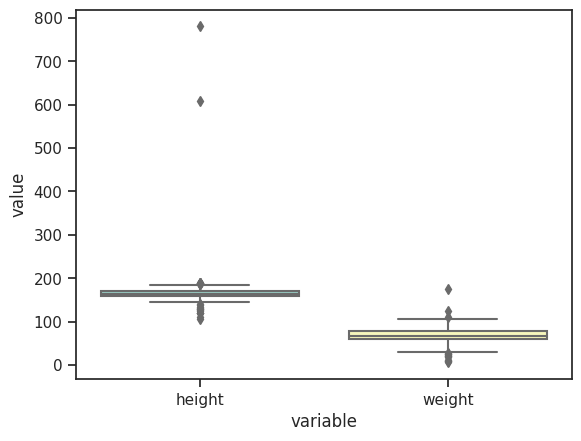

In [71]:
# checking the extreme outliers in weight(kg) and height(cm)
selected_columns = ['height', 'weight']
subset_df = df[selected_columns]

# Reshape the data into a long format
subset_df = pd.melt(subset_df, var_name='variable', value_name='value')

sns.set(style='ticks')
sns.boxplot(x='variable', y='value', data=subset_df, order=selected_columns, palette='Set3')

In [72]:
# dropping the extreme outliers

# Calculate the statistics for height column
Q1_height = df['height'].quantile(0.25)
Q3_height = df['height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

# Define the thresholds for height outliers
Max_height = Q3_height + (1.5 * IQR_height)
Min_height = Q1_height - (1.5 * IQR_height)

In [73]:
# Calculate the statistics for weight column
Q1_weight = df['weight'].quantile(0.25)
Q3_weight = df['weight'].quantile(0.75)
IQR_weight = Q3_weight - Q1_weight

# Define the thresholds for weight outliers
Max_weight = Q3_weight + (1.5 * IQR_weight)
Min_weight = Q1_weight - (1.5 * IQR_weight)


In [74]:
# Filter out extreme outliers in height and weight columns
df = df[(df['height'] >= Min_height) & (df['height'] <= Max_height) & (df['weight'] >= Min_weight) & (df['weight'] <= Max_weight)]

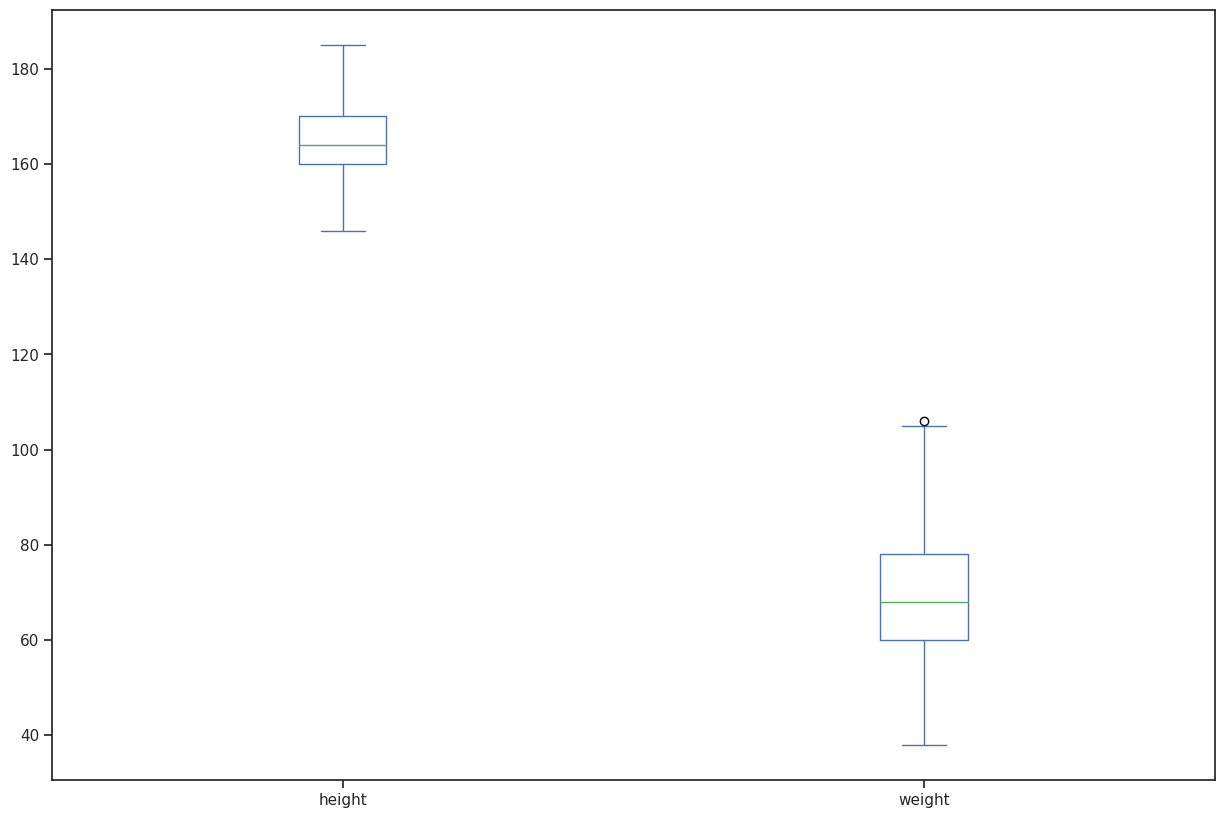

In [75]:
# Plot boxplots for height and weight columns
selected_columns = ['height', 'weight']
df[selected_columns].plot(kind='box', figsize=(15, 10))

plt.show()

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 1 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 937.4 KB


## [EXTRA] Scatter plot 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


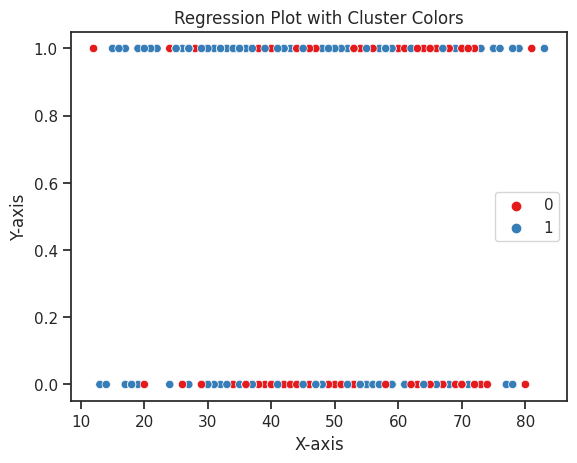

In [77]:
import seaborn as sns
from sklearn.cluster import KMeans

# Select the columns you want to use for clustering
X = df.iloc[:, :]  # Replace with your desired columns

# Initialize the KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=2)  # Replace 2 with your desired number of clusters

# Fit the data to the KMeans model
kmeans.fit(X)

# Obtain the cluster labels for each data point
labels = kmeans.labels_

# Create a scatter plot with different colors for each cluster using Seaborn
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=labels, palette='Set1')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Regression Plot with Cluster Colors')

# Display the plot
plt.show()

## [EXTRA] Calculating the mean and standard deviation

In [78]:
# df = (df - df.mean())/df.std()
# print(df)

## [EXTRA] Correlation using heatmap

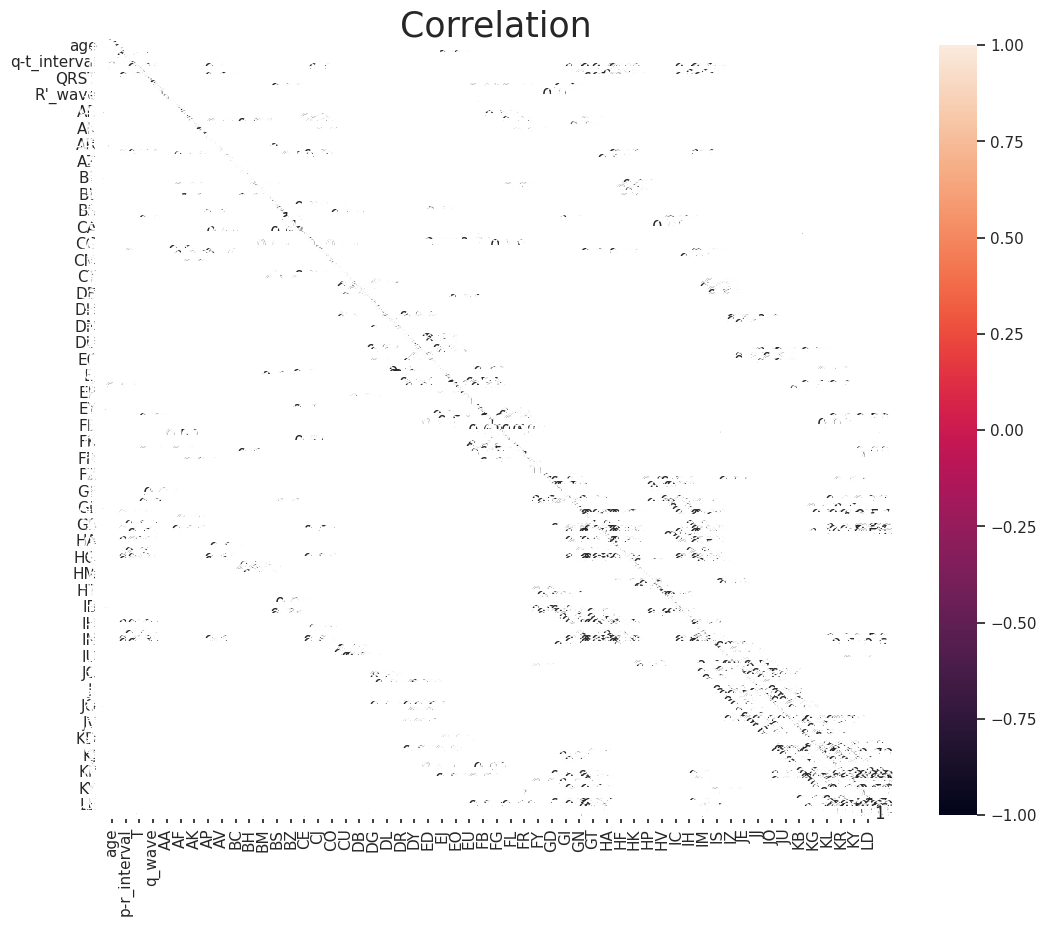

In [79]:
corr= df.corr()

plt.figure(figsize=(15,10))

plt.title('Correlation', y=1, size=25)

sns.heatmap(corr, annot= True, linewidths= .5, square=True)

plt.show()

# Model Exploration

## Splitting Data [NOT USED]

In [80]:
y = df.diagnosis.values 
x = df.drop(["diagnosis"], axis=1) 

In [81]:
# testing 30%, training 70% 
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.3,random_state=42) 
x_train, x_validate, y_train, y_validate = train_test_split(x_train,y_train,test_size=0.25, random_state=42)

In [82]:
x_train.head()  

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
45,75,1,156,55,73,159,350,138,99,-18,...,0.2,0.0,2.9,-1.6,0.0,0,0.7,1.5,3.0,12.0
39,45,0,175,80,94,163,401,159,106,-57,...,-0.4,0.0,3.1,0.0,0.0,0,0.4,1.0,10.5,17.9
95,55,0,185,105,87,292,406,192,175,19,...,0.4,0.0,9.4,-1.9,0.0,0,-0.3,2.2,19.5,37.1
280,41,0,175,97,91,198,402,254,143,-4,...,0.0,0.0,7.1,-3.3,0.5,0,0.6,1.1,15.0,25.7
155,45,0,169,73,92,124,370,180,62,25,...,-0.1,-0.4,9.7,0.0,0.0,0,0.7,2.8,26.9,57.7


In [83]:
x_test.head()  

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LC,LD,LE,LF,LG
443,41,1,154,75,88,157,384,132,112,65,...,-0.4,-0.4,10.5,-2.5,0.0,0,0.5,1.4,17.8,29.5
78,56,1,165,73,90,147,388,178,92,88,...,-1.0,-0.5,14.8,-2.4,0.0,0,1.4,2.4,26.8,51.2
183,57,0,175,80,98,157,304,130,78,43,...,-0.5,-0.7,6.3,0.0,0.0,0,0.7,-1.0,18.1,11.7
32,50,1,160,73,75,125,353,183,63,38,...,-0.2,-0.5,8.1,-0.8,0.0,0,0.7,2.5,14.5,39.5
374,15,1,163,38,84,135,340,247,81,32,...,-0.3,-1.0,14.1,-1.8,0.0,0,0.4,3.8,24.0,60.4


## KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [85]:
class_mapping = {
    1: "Normal",
    2: "Ischemic changes (Coronary Artery Disease)",
    3: "Old Anterior Myocardial Infarction",
    4: "Old Inferior Myocardial Infarction",
    5: "Sinus tachycardy",
    6: "Sinus bradycardy",
    7: "Ventricular Premature Contraction (PVC)",
    8: "Supraventricular Premature Contraction",
    9: "Left bundle branch block",
    10: "Right bundle branch block",
    11: "1. degree AtrioVentricular block",
    12: "2. degree AV block",
    13: "3. degree AV block",
    14: "Left ventricule hypertrophy",
    15: "Atrial Fibrillation or Flutter",
    16: "Others"
}

df['diagnosis'] = df['diagnosis'].map(class_mapping)  


In [98]:
# matrix X and target variable y
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Perform feature scaling using Min-Max Scaling
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)

# Perform feature scaling using Standardization
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
k = 5  # Number of nearest neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7209302325581395


In [105]:
# feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [106]:
# KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [107]:
y_pred = knn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [108]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6744186046511628


## Naive Byes

In [90]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_y_pred)
print("Gaussian Naive Bayes Accuracy:", gnb_accuracy)

# Multinomial Naive Bayes
# mnb = MultinomialNB()
# mnb.fit(X_train, y_train)
# mnb_y_pred = mnb.predict(X_test)
# mnb_accuracy = accuracy_score(y_test, mnb_y_pred)
# print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_y_pred = bnb.predict(X_test)
bnb_accuracy = accuracy_score(y_test, bnb_y_pred)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)


Gaussian Naive Bayes Accuracy: 0.13953488372093023
Bernoulli Naive Bayes Accuracy: 0.686046511627907


# **Reference**

https://stackoverflow.com/questions/62435218/how-to-read-the-dataset-data-and-names-directly-into-python-dataframe-from-u

https://stackoverflow.com/questions/71479659/dataframes-from-data-names-and-test-files-using-pandas

https://towardsdatascience.com/different-imputation-methods-to-handle-missing-data-8dd5bce97583

https://towardsdatascience.com/normalization-vs-standardization-which-one-is-better-f29e043a57eb#:~:text=If%20you%20see%20a%20bell,values%20into%20a%20small%20range.

https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb

https://www.kaggle.com/code/havinath/eda-visualizations-predictions

